# Deep Learining Project 2
###    Wojciech Wieczorek 145465
###    Jerzy Łukaszewicz 145458

For each class, there is one pattern occurring in the data. Solving just a classification task be scored no higher than 70%. 

Please provide either pdf with the report or add some notes in the notebook. Demonstrate some examples of how your approach works.

A short reminder of your task:
 - Correct classification of provided time series
 - Explanation of the prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, RepeatVector, TimeDistributed, Reshape, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import Sequence, plot_model
import tensorflow.keras.backend as K
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
np.random.seed(42)

In [4]:
n = 50000

In [5]:
def createRow(n, classes):
    base = np.sin(np.linspace((np.random.rand(3)),(np.random.rand(3) + np.array([10,15,7])),n))
    if classes[0] > 0:
        base[np.random.randint(0,n), 0] += 2
    if classes[1] > 0:
        base[np.random.randint(0,n), 1] -= 2
    if classes[2] > 0:
        x = np.random.randint(0,n-5)
        base[x:x+4,2] = 0
    if classes[3] > 0:
        x = np.random.randint(0,n-10)
        base[x:x+8,1] += 1.5
    if classes[4] > 0:
        x = np.random.randint(0,n-7)
        base[x:x+6,0] += 1.5
        base[x:x+6,2] -= 1.5
    base += np.random.rand(*base.shape)*.2
    return base

In [24]:
xl, yl = [], []
for _ in range(n):
    cl = np.random.rand(5)<.25
    xl.append(createRow(np.random.randint(40,60), cl))
    yl.append(cl)
    
xl = np.array(xl)
yl = np.array(yl).astype(int)

[1 0 0 0 0]


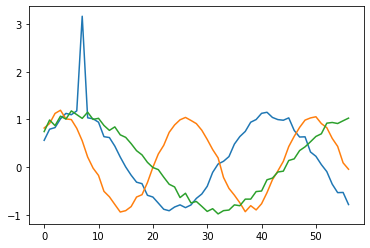

[1 0 0 0 0]


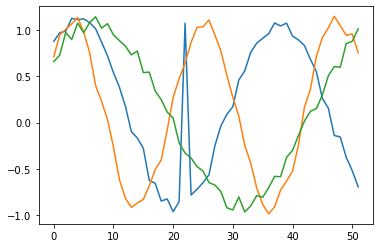

[0 0 0 0 0]


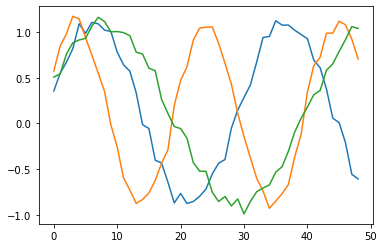

In [25]:
for i in range(3):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

#### Split sizes: 
* 80% - train
* 10% - validation
* 10% - test

In [28]:
nopad_X_train, nopad_X_test, y_train, y_test = train_test_split(xl, yl, test_size=0.2, random_state=42)
nopad_X_test, nopad_X_val, y_test, y_val = train_test_split(nopad_X_test, y_test, test_size=0.5, random_state=42)

In [29]:
X_train = pad_sequences(nopad_X_train, padding="post", dtype='float32', maxlen=60)
X_test = pad_sequences(nopad_X_test, padding="post", dtype='float32', maxlen=60)
X_val = pad_sequences(nopad_X_val, padding="post", dtype='float32', maxlen=60)

In [30]:
model = Sequential()
model.add(Input(shape=(None, 3)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(5,activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 64)          17408     
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 46,629
Trainable params: 46,629
Non-trainable params: 0
_________________________________________________________________


In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train,y_train, epochs=25, validation_data = (X_val, y_val), batch_size=64, callbacks=[callback])

Epoch 1/25
625/625 [==============================] - 50s 72ms/step - loss: 0.3828 - recall: 0.3478 - precision: 0.9599 - val_loss: 0.2783 - val_recall: 0.5496 - val_precision: 0.9674
Epoch 2/25
625/625 [==============================] - 43s 68ms/step - loss: 0.2490 - recall: 0.6215 - precision: 0.9469 - val_loss: 0.2321 - val_recall: 0.6831 - val_precision: 0.9067
Epoch 3/25
625/625 [==============================] - 46s 73ms/step - loss: 0.2107 - recall: 0.6688 - precision: 0.9717 - val_loss: 0.1892 - val_recall: 0.7011 - val_precision: 0.9695
Epoch 4/25
625/625 [==============================] - 47s 76ms/step - loss: 0.2031 - recall: 0.6833 - precision: 0.9686 - val_loss: 0.1810 - val_recall: 0.7214 - val_precision: 0.9796
Epoch 5/25
625/625 [==============================] - 46s 74ms/step - loss: 0.2020 - recall: 0.6926 - precision: 0.9589 - val_loss: 0.2012 - val_recall: 0.6867 - val_precision: 0.9700
Epoch 6/25
625/625 [==============================] - 48s 77ms/step - loss: 0.17

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

In [17]:
model.save("model_numero_uno")

INFO:tensorflow:Assets written to: model_numero_uno\assets


INFO:tensorflow:Assets written to: model_numero_uno\assets


In [43]:
model.predict(np.array([X_test[12]])).round()

array([[0., 0., 1., 0., 0.]], dtype=float32)

[0 0 1 0 0]


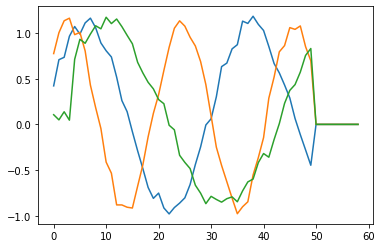

In [42]:
plt.plot(X_test[12])
print(y_test[12])

In [32]:
model = Sequential()
model.add(Input(shape=(None, 3)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(5,activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 64)            17408     
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 32)            8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 46,629
Trainable params: 46,629
Non-trainable params: 0
_________________________________________________________________


In [33]:
pred_model = Sequential()
pred_model.add(Reshape((-1, 10, 3), input_shape=(60, 3)))
pred_model.add(TimeDistributed(miniModel))
pred_model.add(GlobalMaxPool1D())
pred_model.compile('adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])
pred_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 6, 10, 3)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 6, 5)              46629     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 5)                 0         
Total params: 46,629
Trainable params: 46,629
Non-trainable params: 0
_________________________________________________________________


In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
pred_model.fit(X_train,y_train, epochs=5, validation_data = (X_val, y_val), batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/5
625/625 [==============================] - 38s 51ms/step - loss: 0.4212 - binary_accuracy: 0.8175 - val_loss: 0.3521 - val_binary_accuracy: 0.8498
Epoch 2/5
625/625 [==============================] - 28s 44ms/step - loss: 0.3235 - binary_accuracy: 0.8612 - val_loss: 0.2749 - val_binary_accuracy: 0.8840
Epoch 3/5
625/625 [==============================] - 28s 45ms/step - loss: 0.2328 - binary_accuracy: 0.9042 - val_loss: 0.2040 - val_binary_accuracy: 0.9197
Epoch 4/5
625/625 [==============================] - 28s 44ms/step - loss: 0.1735 - binary_accuracy: 0.9343 - val_loss: 0.1222 - val_binary_accuracy: 0.9598
Epoch 5/5
625/625 [==============================] - 32s 51ms/step - loss: 0.0861 - binary_accuracy: 0.9735 - val_loss: 0.0625 - val_binary_accuracy: 0.9810


In [35]:
model2 = Model(inputs=pred_model.layers[0].input, outputs=pred_model.layers[-2].output)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 60, 3)]           0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 6, 10, 3)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 6, 5)              46629     
Total params: 46,629
Trainable params: 46,629
Non-trainable params: 0
_________________________________________________________________


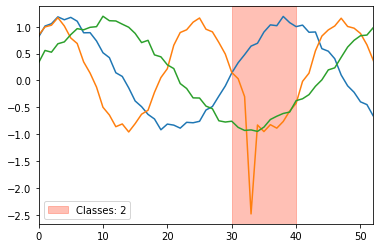

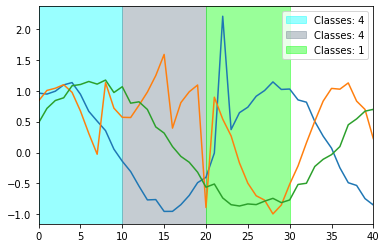

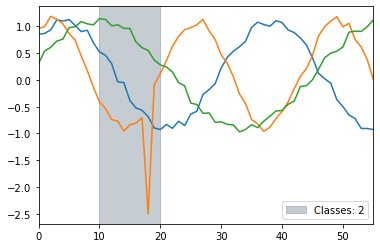

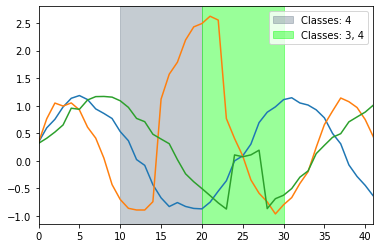

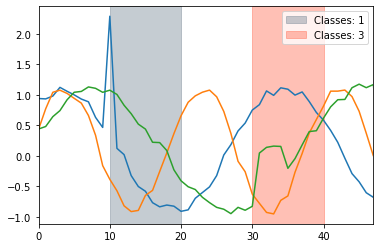

In [59]:
colors = ['cyan', 'slategray', 'lime', 'tomato', 'peru', 'navy']

data = X_val[100:105]
pom = nopad_X_val[100:105]
perdictions = model2.predict(data)

for idx, p in enumerate(perdictions):
    plt.figure()
    plt.plot(data[idx])
    for i in range(6):
        classes = ""
        for j in range(5):
            if p[i, j].round() > 0:
                classes += str(j+1) + ', '
        
        classes = classes.strip(', ')
        
        if len(classes) > 0:
            plt.axvspan(i*10, i*10+10, color=colors[i], alpha=0.4, label="Classes: " + classes)
    
    plt.xlim([0, len(pom[idx])-1])
    plt.legend()
    plt.show()